In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
import time
import statsmodels.api as sm

from geopy.geocoders import Nominatim
from folium import plugins
from folium.plugins import HeatMap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from termcolor import colored as cl

print("Team 10")

Team 10


In [2]:
#DataSet Brazilian Ecommerce
#olist_order_reviews_dataset.csv
df_olist_reviews = pd.read_csv("./e-commerce/datasets/brazilian-ecommerce/olist_order_reviews_dataset.csv")
df_olist_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
#DataSet Brazilian Ecommerce
#olist_order_payments_dataset.csv
df_olist_payments = pd.read_csv("./e-commerce/datasets/brazilian-ecommerce/olist_order_payments_dataset.csv")
df_olist_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
#DataSet Brazilian Ecommerce
#olist_order_items_dataset.csv
df_olist_items = pd.read_csv("./e-commerce/datasets/brazilian-ecommerce/olist_order_items_dataset.csv")
df_olist_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
#DataSet Brazilian Ecommerce
#olist_orders_dataset.csv
df_olist_orders = pd.read_csv("./e-commerce/datasets/brazilian-ecommerce/olist_orders_dataset.csv")
df_olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
#DataSet Brazilian Ecommerce
#olist_customers_dataset.csv
df_olist_customer = pd.read_csv("./e-commerce/datasets/brazilian-ecommerce/olist_customers_dataset.csv")
df_olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
#DataSet Brazilian Ecommerce
#olist_geolocation_databset.csv
df_olist_geo = pd.read_csv("./e-commerce/datasets/brazilian-ecommerce/olist_geolocation_dataset.csv")
df_olist_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
#DataSet Brazilian Ecommerce
#olist_products_dataset.csv
df_olist_products = pd.read_csv("./e-commerce/datasets/brazilian-ecommerce/olist_products_dataset.csv")
df_olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
#DataSet Brazilian Ecommerce
#product_category_name_translation.csv
category_translation = pd.read_csv("./e-commerce/datasets/brazilian-ecommerce/product_category_name_translation.csv")
category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
data_base = df_olist_items.copy()

In [11]:
data_base = pd.merge(data_base, df_olist_orders, on= "order_id", how="left")

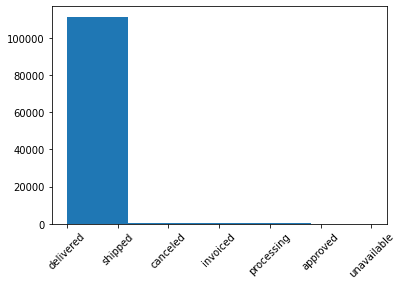

In [12]:
x=data_base['order_status']

plt.hist(x, bins=5)
plt.xticks(rotation=45)
plt.show()

In [13]:
data_base = data_base[data_base['order_status'] == "delivered"]

In [14]:
data_base = pd.merge(data_base, df_olist_customer[["customer_id", "customer_city", "customer_state", "customer_zip_code_prefix"]], on= "customer_id", how="left")

In [15]:
data_base = pd.merge(data_base, df_olist_products[["product_id", "product_category_name", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]], on= "product_id", how="left")

In [16]:
data_base["order_delivered_carrier_date"] = pd.to_datetime(data_base['order_delivered_carrier_date'])
data_base['order_delivered_customer_date'] = pd.to_datetime(data_base['order_delivered_customer_date'])
data_base['order_estimated_delivery_date'] = pd.to_datetime(data_base['order_estimated_delivery_date'])
data_base['order_approved_at'] = pd.to_datetime(data_base['order_approved_at'])
data_base['order_purchase_timestamp'] = pd.to_datetime(data_base['order_purchase_timestamp'])
data_base['order_purchase_timestamp'] = pd.to_datetime(data_base['order_purchase_timestamp'])
data_base["delivery_time_days"]= (data_base['order_delivered_customer_date']- data_base["order_purchase_timestamp"]).dt.days
data_base["year_purchase"]= data_base["order_purchase_timestamp"].dt.year

In [17]:
data_base["cubic_dimensions"] = data_base["product_length_cm"] * data_base["product_height_cm"] * data_base["product_width_cm"]

In [18]:
data_base.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        2
order_delivered_customer_date       8
order_estimated_delivery_date       0
customer_city                       0
customer_state                      0
customer_zip_code_prefix            0
product_category_name            1537
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
delivery_time_days                  8
year_purchase                       0
cubic_dimensions                   18
dtype: int64

In [19]:
data_base = data_base[(data_base["delivery_time_days"].isnull()== False) & (data_base["cubic_dimensions"].isnull()== False)]

In [20]:
df_olist_geo["geo_key"] = df_olist_geo["geolocation_city"] + df_olist_geo["geolocation_state"]
data_base["geo_key"] = data_base["customer_city"] + data_base["customer_state"]

In [21]:
data_base = pd.merge(data_base, df_olist_geo[["geo_key", "geolocation_lat", "geolocation_lng"]].drop_duplicates(subset = "geo_key"), on="geo_key", how="left")

In [22]:
data_base.drop("geo_key", axis=1, inplace=True)

In [23]:
data_base["revenue"] = data_base["order_item_id"] * data_base["price"]

In [24]:
data_base = pd.merge(data_base, category_translation, on="product_category_name", how="left")

In [25]:
data_base["freight_ratio"] = round(data_base["freight_value"] / data_base["price"], 2)


In [26]:
pd.set_option('display.max_columns', None)
data_base.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivery_time_days,year_purchase,cubic_dimensions,geolocation_lat,geolocation_lng,revenue,product_category_name_english,freight_ratio
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,campos dos goytacazes,RJ,28013,cool_stuff,650.0,28.0,9.0,14.0,7.0,2017,3528.0,-21.720140,-41.310453,58.90,cool_stuff,0.23
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,santa fe do sul,SP,15775,pet_shop,30000.0,50.0,30.0,40.0,16.0,2017,60000.0,-20.212393,-50.941471,239.90,pet_shop,0.08
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,para de minas,MG,35661,moveis_decoracao,3050.0,33.0,13.0,33.0,7.0,2018,14157.0,-19.847170,-44.601957,199.00,furniture_decor,0.09
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,atibaia,SP,12952,perfumaria,200.0,16.0,10.0,15.0,6.0,2018,2400.0,-23.112774,-46.548885,12.99,perfumery,0.98
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,varzea paulista,SP,13226,ferramentas_jardim,3750.0,35.0,40.0,30.0,25.0,2017,42000.0,-23.184985,-46.825698,199.90,garden_tools,0.09


In [27]:
state_revenue = data_base[data_base["geolocation_lat"].isna()==False].groupby("customer_state")["revenue"].sum().reset_index()
state_revenue = pd.merge(state_revenue, df_olist_geo[["geolocation_state", "geolocation_lat", "geolocation_lng"]].drop_duplicates(subset = "geolocation_state"),
                        left_on="customer_state", right_on="geolocation_state", how="left")

In [28]:
state_revenue_map = folium.Map(location=[-8.528795980809576, -56.2085482189893],
                             zoom_start = 5,
                             titles="OpenStreetMap")

for index, info in state_revenue.iterrows():
    location = [info["geolocation_lat"], info["geolocation_lng"]]
    description = f'State: {info["customer_state"].title()},\n Revenue (R$): {round(info["revenue"], 2)}'
    popup = folium.Popup(description, max_width=300)
    folium.Marker(location, popup=popup).add_to(state_revenue_map)

state_revenue_map

In [29]:
city_revenue = data_base[data_base["geolocation_lat"].isna()==False].groupby(["customer_city", "geolocation_lat", "geolocation_lng"])["revenue"].sum().reset_index()

city_revenue = city_revenue[["geolocation_lat", "geolocation_lng", "revenue"]]

In [30]:
max_revenue = city_revenue["revenue"].max()

city_revenue_map = folium.Map(location=[-8.528795980809576, -56.2085482189893],
                             zoom_start = 5,
                             titles="OpenStreetMap")

hm_size = HeatMap(list(zip(city_revenue["geolocation_lat"], city_revenue["geolocation_lng"], city_revenue["revenue"])),
                  min_opacity=0.50, max_val=max_revenue, radius=10, blur=6)

city_revenue_map.add_child(hm_size)

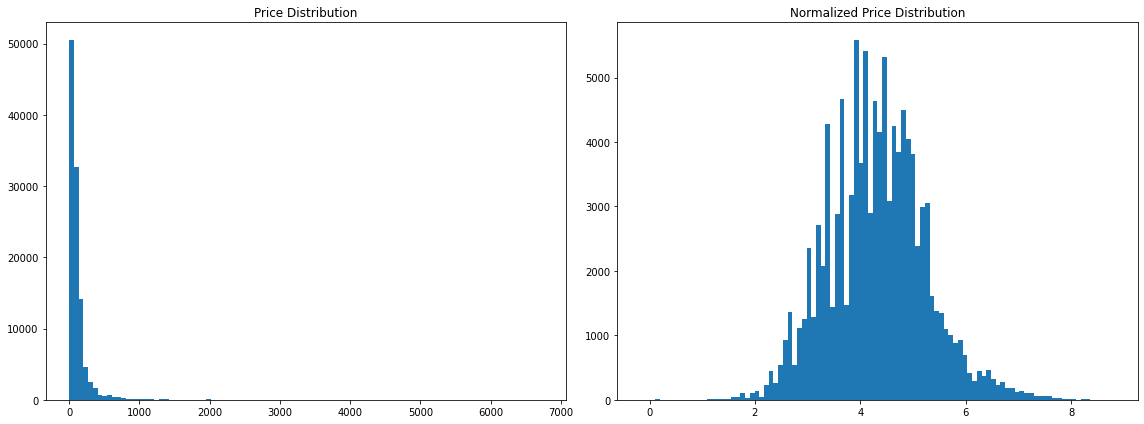

In [31]:
graph1 = data_base["price"]
graph2 = np.log(data_base["price"])

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6));

ax1.hist(graph1, bins=100)
ax1.set_title("Price Distribution")

ax2.hist(graph2, bins=100)
ax2.set_title("Normalized Price Distribution")

plt.tight_layout();

In [1]:
categories = data_base.groupby("product_category_name_english")["price"].size().sort_values(ascending=True)[:10].reset_index()["product_category_name_english"]

plt.figure(figsize=(20, 8))
graph = sns.boxplot(y=data_base[data_base["product_category_name_english"].isin(categories)]["price"], x=data_base[data_base["product_category_name_english"].isin(categories)]["product_category_name_english"])
graph.set(yscale="log", title = "Price Distribution By Product Category");

NameError: name 'data_base' is not defined

In [33]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110171 entries, 0 to 110170
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110171 non-null  object        
 1   order_item_id                  110171 non-null  int64         
 2   product_id                     110171 non-null  object        
 3   seller_id                      110171 non-null  object        
 4   shipping_limit_date            110171 non-null  object        
 5   price                          110171 non-null  float64       
 6   freight_value                  110171 non-null  float64       
 7   customer_id                    110171 non-null  object        
 8   order_status                   110171 non-null  object        
 9   order_purchase_timestamp       110171 non-null  datetime64[ns]
 10  order_approved_at              110156 non-null  datetime64[ns]
 11  

In [34]:
data_base[["delivery_time_days", "product_weight_g", "cubic_dimensions", "revenue", "freight_ratio"]].describe().round(2)

,delivery_time_days,product_weight_g,cubic_dimensions,revenue,freight_ratio
count,110171.00,110171.00,110171.00,110171.00,110171.00
mean,12.01,2089.69,15174.00,135.95,0.32
std,9.45,3741.68,23239.07,215.97,0.35
min,0.00,0.00,168.00,0.85,0.00
25%,6.00,300.00,2850.00,45.00,0.13
50%,10.00,700.00,6460.00,84.00,0.23
75%,15.00,1800.00,18150.00,149.90,0.39
max,209.00,40425.00,296208.00,13440.00,26.24


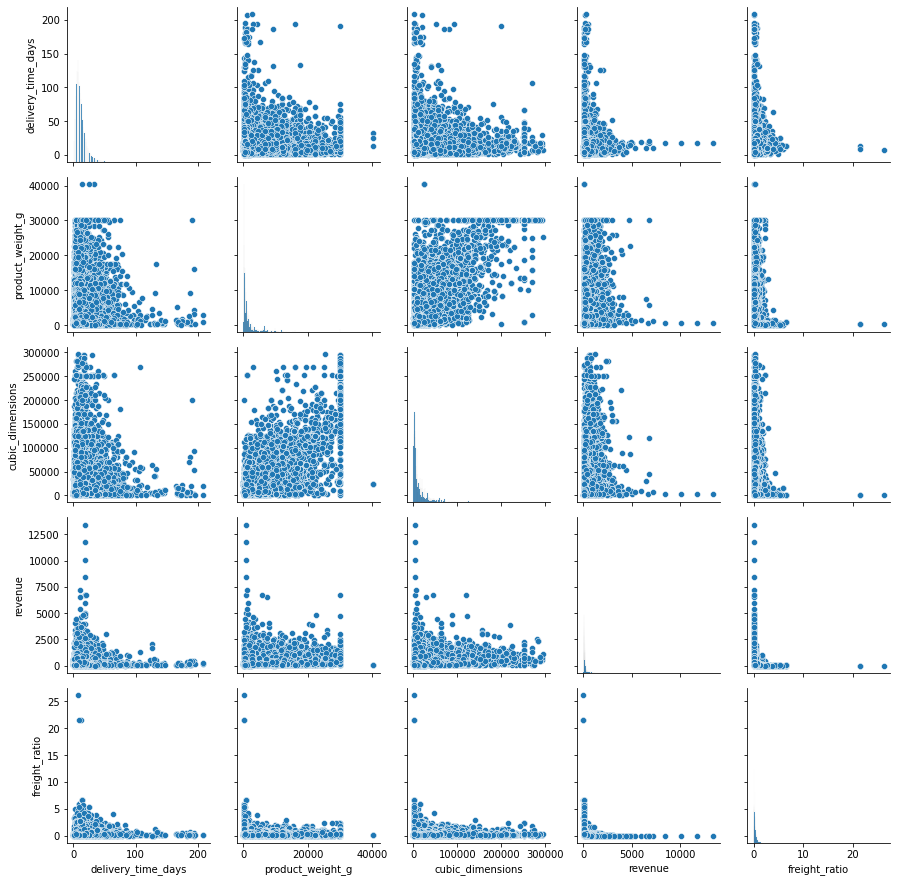

In [35]:
g = sns.PairGrid(data_base[["delivery_time_days", "product_weight_g", "cubic_dimensions", "revenue", "freight_ratio"]])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

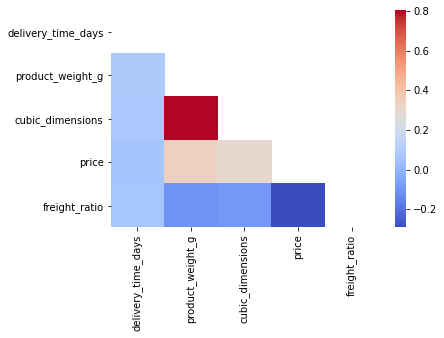

In [36]:
matrix = np.triu(data_base[["delivery_time_days", "product_weight_g", "cubic_dimensions", "price", "freight_ratio"]].corr())
sns.heatmap(data_base[["delivery_time_days", "product_weight_g", "cubic_dimensions", "price", "freight_ratio"]].corr(), 
            mask=matrix, cmap="coolwarm");

In [37]:
regression_data = data_base[["delivery_time_days","product_weight_g", "cubic_dimensions", "price", "freight_ratio"]].reset_index(drop=True)
regression_data_norm = (regression_data - regression_data.min()) / (regression_data.max() - regression_data.min())
dummies = pd.get_dummies(data_base["customer_state"], columns= ["customer_state"], prefix="", prefix_sep="")
regression_data = pd.concat([regression_data.reset_index(drop=True), dummies.reset_index(drop=True)], axis=1)
model_data = pd.concat([regression_data_norm.reset_index(drop=True), dummies.reset_index(drop=True)], axis=1)

In [38]:
excluded_variables = ["delivery_time_days", "TO"]

In [39]:
X_var = model_data[model_data.columns[~model_data.columns.isin(excluded_variables)]]
y_var= regression_data["delivery_time_days"].reset_index(drop=True)

slr_model = sm.OLS(y_var, X_var) # Ordinary Least Squares 
slr_reg = slr_model.fit()

In [40]:
slr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     delivery_time_days   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.684
Method:                 Least Squares   F-statistic:                              7937.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                        0.00
Time:                        22:38:16   Log-Likelihood:                     -3.9331e+05
No. Observations:              110171   AIC:                                  7.867e+05
Df Residuals:                  110141   BIC:                                  7.870e+05
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
product_weight_g     5.3288      0.479     11.116      0.000       4.389       6.268
cubic_dimensions     4.3463      0.557      7.799      0.000       3.254       5.439
price                5.3981      1.066      5.064      0.000       3.309       7.488
freight_ratio       14.1347      2.078      6.802      0.000      10.062      18.208
AC                  19.4755      0.903     21.576      0.000      17.706      21.245
AL                  23.1300      0.419     55.164      0.000      22.308      23.952
AM                  25.2057      0.675     37.337      0.000      23.883      26.529
AP                  26.9971      0.956     28.238      0.000      25.123      28.871
BA                  17.9341      0.148    121.027      0.000      17.644      18.225
CE                  19.7044      0.233     84.742      0.000      19.249      20.160
DF                  11.8036      0.181     65.104      0.000      11.448      12.159
ES                  14.4190      0.186     77.358      0.000      14.054      14.784
GO                  14.2006      0.184     77.030      0.000      13.839      14.562
MA                  20.3090      0.309     65.747      0.000      19.704      20.914
MG                  10.7377      0.085    126.939      0.000      10.572      10.903
MS                  14.2553      0.305     46.800      0.000      13.658      14.852
MT                  16.6593      0.271     61.528      0.000      16.129      17.190
PA                  22.4000      0.270     83.058      0.000      21.871      22.929
PB                  19.1528      0.360     53.248      0.000      18.448      19.858
PE                  16.9777      0.211     80.387      0.000      16.564      17.392
PI                  17.9660      0.380     47.291      0.000      17.221      18.711
PR                  10.7085      0.121     88.675      0.000      10.472      10.945
RJ                  13.8901      0.082    169.830      0.000      13.730      14.050
RN                  18.0476      0.380     47.465      0.000      17.302      18.793
RO                  18.3014      0.524     34.947      0.000      17.275      19.328
RR                  26.9248      1.269     21.225      0.000      24.438      29.411
RS                  13.9268      0.117    119.330      0.000      13.698      14.156
SC                  13.7245      0.140     98.033      0.000      13.450      13.999
SE                  20.0119      0.447     44.797      0.000      19.136      20.887
SP                   7.5418      0.052    146.170      0.000       7.441       7.643
==============================================================================
Omnibus:                   105179.879   Durbin-Watson:                   1.795
Prob(Omnibus):       

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 5)

lr = LinearRegression()
lr.fit(X_train, y_train)

indexes = X_test.index

denormalized_data = regression_data.loc[indexes][regression_data.columns[~regression_data.columns.isin(excluded_variables)]]

prediction = lr.predict(denormalized_data)

In [42]:
print(cl('R-Squared :', attrs = ['bold']), lr.score(denormalized_data, y_test))

R-Squared : -179950047.10549876


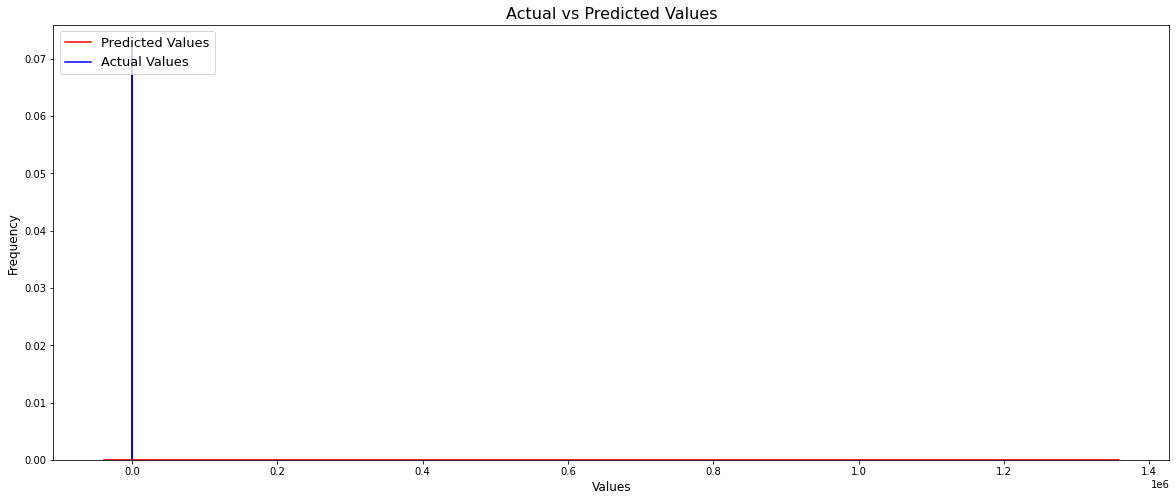

In [43]:
plt.figure(figsize=(20, 8))
sns.kdeplot(prediction, color = 'r', label = 'Predicted Values')
sns.kdeplot(y_test, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13);
